In [2]:
import import_ipynb
from Model_Functions import *

# 8. Logistic Regression for Personalized Cancer Diagnosis

The CalibratedClassifierCV we used here, grabs (yi)s and converts them to their probabilities. We need to do so because here we are using logloss and logloss requires probability values to operate.
<br>
Here we are implementing Logistic Regression using SGDClassifier. As long as we are using we are using logloss as loss function, SGDClassifier is nothing but Logistic Regression. We are balancing the data using oversampling so that smaller classes also work well, otherwise smaller classes (like class 8 in this case) would vanish and disappear in heatmap.

### 8.1 Training Logistic Regression model

In [3]:
from sklearn.linear_model import SGDClassifier

In [5]:
alpha = [10**x for x in range (-7, 5)]
logloss_cv = []
for i in alpha:
    print('For alpha =', i)
    algo = SGDClassifier(alpha=i, penalty='l2', class_weight='balanced', loss='log', random_state=42)
    algo.fit(train_x_onehotCoding, y_train)
    sigmoid_clf = CalibratedClassifierCV(algo, method="sigmoid")
    sigmoid_clf.fit(train_x_onehotCoding, y_train)
    # To avoid rounding error while multiplying probabilites we use log-probability estimates
    sigmoid_clf_probs = sigmoid_clf.predict_proba(cv_x_onehotCoding)
    logloss_cv.append(log_loss(cv_y, sigmoid_clf_probs, labels=algo.classes_, eps=1e-15))
    
    print("Log Loss :",log_loss(cv_y, sigmoid_clf_probs))

For alpha = 1e-07
Log Loss : 1.2371988715522115
For alpha = 1e-06
Log Loss : 1.242836482502153
For alpha = 1e-05
Log Loss : 1.1906064937385241
For alpha = 0.0001
Log Loss : 1.053699692428403
For alpha = 0.001
Log Loss : 1.0594884267817697
For alpha = 0.01
Log Loss : 1.1634015918376455
For alpha = 0.1
Log Loss : 1.4708211662168458
For alpha = 1
Log Loss : 1.7090892823266746
For alpha = 10
Log Loss : 1.7388587243409903
For alpha = 100
Log Loss : 1.7418553303218978
For alpha = 1000
Log Loss : 1.7422258414227645
For alpha = 10000
Log Loss : 1.7426114787201505


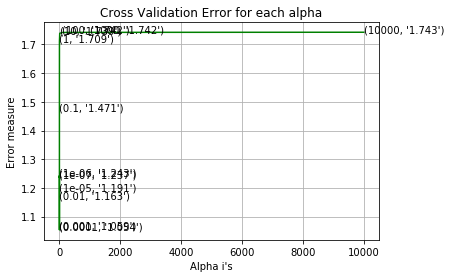

In [6]:
fig, ax = plt.subplots()
ax.plot(alpha, logloss_cv, c='g')
for i, txt in enumerate(np.round(logloss_cv, 3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i], logloss_cv[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [7]:
best_alpha = np.argmin(logloss_cv)
algo = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', class_weight='balanced', loss='log', random_state=42)
algo.fit(train_x_onehotCoding, y_train)
sigmoid_clf = CalibratedClassifierCV(algo, method="sigmoid")
sigmoid_clf.fit(train_x_onehotCoding, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(class_weight='balanced',
                                                    loss='log',
                                                    random_state=42))

In [8]:
predict_y = sigmoid_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=algo.classes_, eps=1e-15))
predict_y = sigmoid_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=algo.classes_, eps=1e-15))
predict_y = sigmoid_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=algo.classes_, eps=1e-15))

For values of best alpha =  0.0001 The train log loss is: 0.4854957399643688
For values of best alpha =  0.0001 The cross validation log loss is: 1.053699692428403
For values of best alpha =  0.0001 The test log loss is: 1.2030396050235974


### 8.2 Testing Logistic Regression model

Log loss : 1.053699692428403
Mis-classified points : 33.83458646616541 %


------------------------------ Confusion matrix ------------------------------



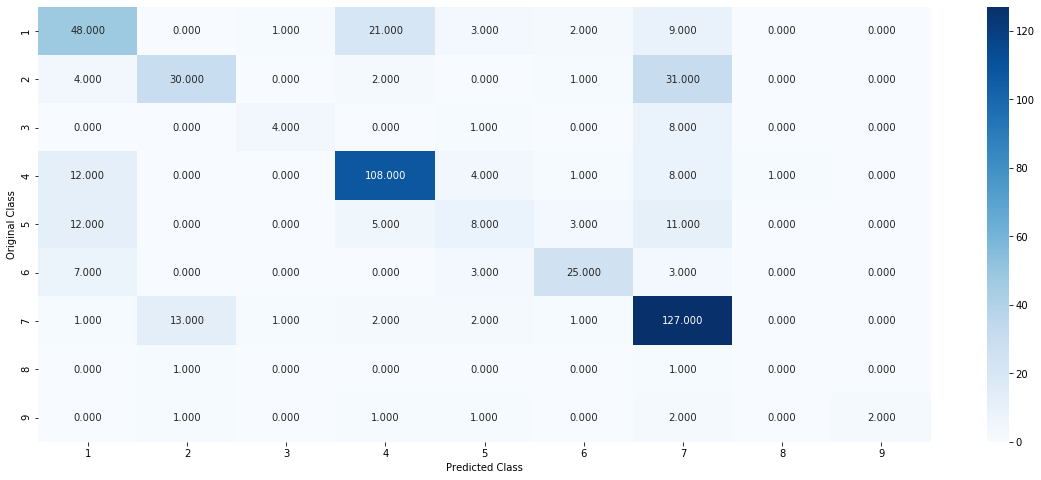



------------------------------ Precision matrix (Columm Sum=1) ------------------------------



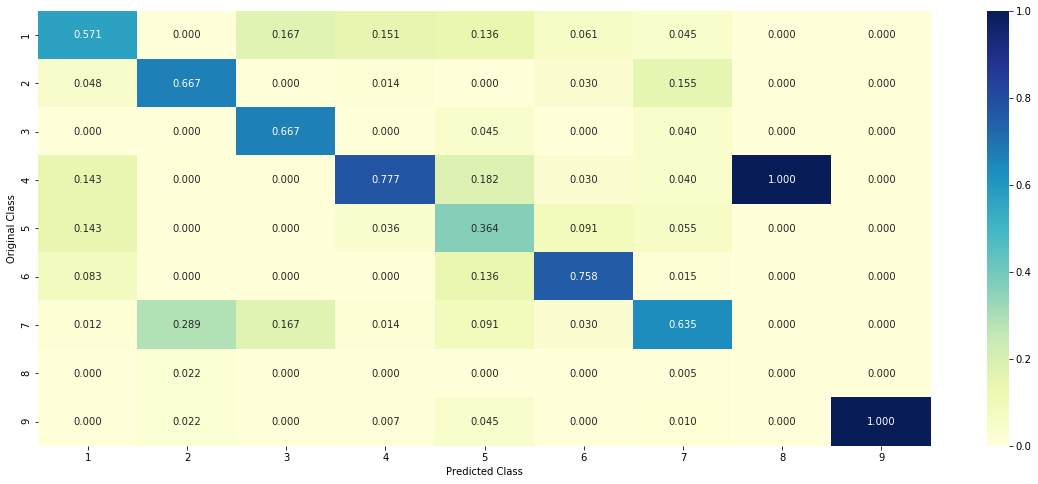



------------------------------ Recall matrix (Row sum=1) ------------------------------



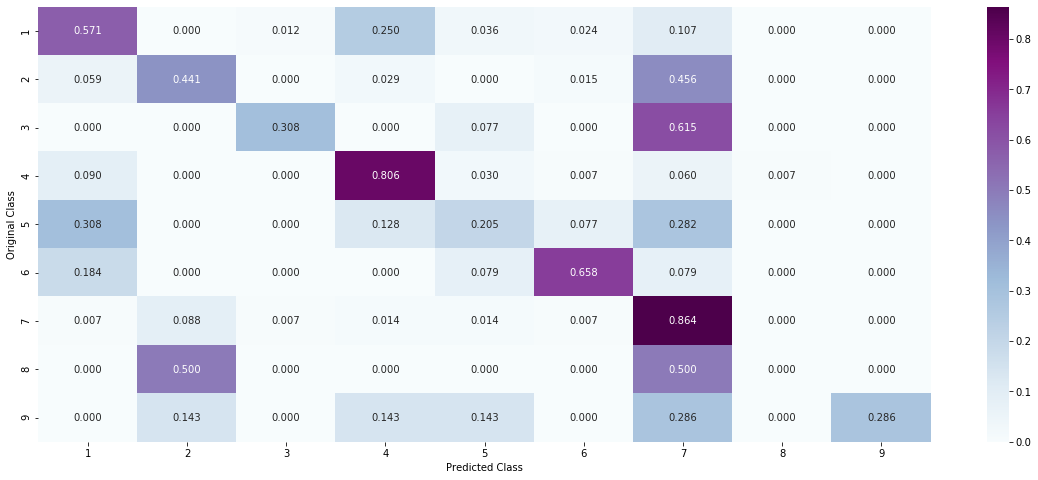

In [9]:
algo = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', class_weight='balanced', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, y_train, cv_x_onehotCoding, y_cv, algo)

### 8.3 Feature Importance: Correctly Classified Points

In [10]:
algo = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', class_weight='balanced', loss='log', random_state=42)
algo.fit(train_x_onehotCoding, y_train)
test_point_index = 1
no_feature = 100
predicted_cls = sigmoid_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices=np.argsort(-1*abs(algo.coef_))[predicted_cls-1][:,:no_feature]
print("=="*30)
get_impfeature_names(indices[0], x_test['Text'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.7144 0.0154 0.0038 0.1873 0.0463 0.015  0.0103 0.0036 0.0039]]
Actual Class : 5
Out of the top  100  features  0 are present in query point


### 8.4 Feature Importance: Incorrectly Classified Points

In [11]:
test_point_index = 100
no_feature = 100
predicted_cls = sigmoid_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", y_test[test_point_index])
indices = np.argsort(-1*abs(algo.coef_))[predicted_cls-1][:,:no_feature]
print("=="*30)
get_impfeature_names(indices[0], x_test['Text'].iloc[test_point_index], x_test['Gene'].iloc[test_point_index], x_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.3342 0.0785 0.0264 0.3508 0.0367 0.0238 0.1354 0.0069 0.0074]]
Actual Class : 1
Out of the top  100  features  0 are present in query point
